# Report the experiment consensus algorithm

### Import modules of consensus algorithm

In [1]:
from consensus.PBFT_Simulator import PBFT_Simulator
from consensus.QPBFT_Simulator import QPBFT_Simulator
from consensus.Proposed_Simulator import Proposed_Simulator
import time
import numpy

## Evaluatoin function

In [2]:
# All functions in this cell are Transmission Latency (TL) and Probaility of Proving Messages Successfully (PPMS) after sending requests
def evaluation_pbft_TL_PPMS(num_request:int, num_nodes:int):
    consensus = PBFT_Simulator(num_nodes)
    start = time.perf_counter()
    for i in range(num_request):
        consensus.send_request(f"Hello world {i}")
    end = time.perf_counter()
    delay = (end-start) * 1000
    prob_success = consensus.success_proof / (num_request * 1.0)
    del consensus
    
    return (delay, prob_success)

def evaluation_qpbft_TL_PPMS(num_request:int, num_managing:int, num_voting:int):
    consensus = QPBFT_Simulator(num_managing, num_voting)
    
    start = time.perf_counter()
    for i in range(num_request):
        consensus.send_request(f"Hello world {i}")
    end = time.perf_counter()
    delay = (end-start) * 1000
    prob_success = consensus.success_proof / (num_request * 1.0)
    del consensus
    
    return (delay, prob_success)

def evaluation_proposed_scheme_TL_PPMS(num_request:int, num_master:int, num_slave:int,  num_random:int):
    consensus = Proposed_Simulator(num_master, num_slave, num_random)
    start = time.perf_counter()
    for i in range(num_request):
        consensus.send_request(f"Hello world {i}")
    end = time.perf_counter()
    delay = (end-start) * 1000
    prob_success = consensus.success_proof / (num_request * 1.0)
    del consensus
    
    return (delay, prob_success)

In [3]:
num_requests = numpy.array([i for i in range(10, 301, 10)])
REQUESTS_LENGTH = num_requests.shape[0]

## PBFT Algorithm

In [4]:
delays_request_pbft = numpy.array([])
probability_request_pbft = numpy.array([])

for i in range(REQUESTS_LENGTH):
    result = evaluation_pbft_TL_PPMS(num_requests[i], 10)
    delays_request_pbft = numpy.append(delays_request_pbft, result[0])
    probability_request_pbft = numpy.append(probability_request_pbft, result[1])

## QPBFT Algorithm

In [5]:
delays_request_qpbft = numpy.array([])
probability_request_qpbft = numpy.array([])

for i in range(REQUESTS_LENGTH):
    result = evaluation_qpbft_TL_PPMS(num_requests[i], 6, 4)
    delays_request_qpbft = numpy.append(delays_request_qpbft, result[0])
    probability_request_qpbft = numpy.append(probability_request_qpbft, result[1])

## Proposed Scheme 1
> num_random = 4

In [6]:
delays_request_proposed = numpy.array([])
probability_request_proposed = numpy.array([])

for i in range(REQUESTS_LENGTH):
    result = evaluation_proposed_scheme_TL_PPMS(num_requests[i], 6, 4, 4)
    delays_request_proposed = numpy.append(delays_request_proposed, result[0])
    probability_request_proposed = numpy.append(probability_request_proposed, result[1])

> num_random = 6

In [7]:
delays_request_proposed2 = numpy.array([])
probability_request_proposed2 = numpy.array([])

for i in range(REQUESTS_LENGTH):
    result = evaluation_proposed_scheme_TL_PPMS(num_requests[i], 6, 4, 6)
    delays_request_proposed2 = numpy.append(delays_request_proposed2, result[0])
    probability_request_proposed2 = numpy.append(probability_request_proposed2, result[1])

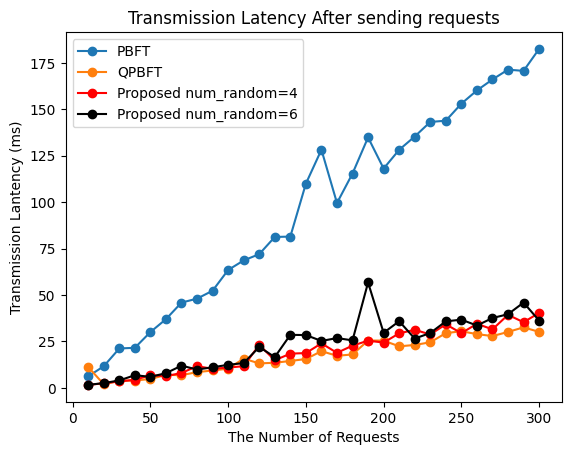

In [8]:
import matplotlib.pyplot as plot

plot.plot(num_requests, delays_request_pbft, label = "PBFT", marker="o")
plot.plot(num_requests, delays_request_qpbft, label = "QPBFT", marker="o")
plot.plot(num_requests, delays_request_proposed, label = "Proposed num_random=4", color="red", marker="o")
plot.plot(num_requests, delays_request_proposed2, label = "Proposed num_random=6", color="black", marker="o")
plot.legend()
plot.xlabel("The Number of Requests")
plot.ylabel("Transmission Lantency (ms)")
plot.title("Transmission Latency After sending requests")
plot.show()

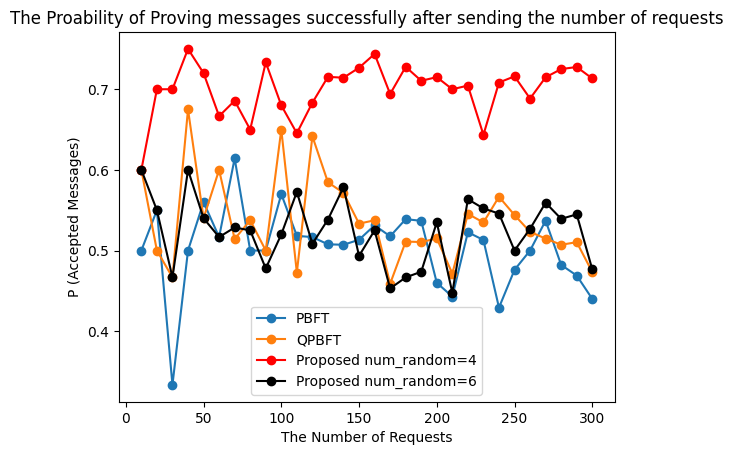

In [9]:
plot.plot(num_requests, probability_request_pbft, label = "PBFT", marker="o")
plot.plot(num_requests, probability_request_qpbft, label = "QPBFT", marker="o")
plot.plot(num_requests, probability_request_proposed, label = "Proposed num_random=4", color="red", marker="o")
plot.plot(num_requests, probability_request_proposed2, label = "Proposed num_random=6", color="black", marker="o")
plot.legend()
plot.xlabel("The Number of Requests")
plot.ylabel("P (Accepted Messages)")
plot.title("The Proability of Proving messages successfully after sending the number of requests")
plot.show()